In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_traffic = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
aircrashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

## Data Pre-processing (or) Data Wrangling

In [4]:
air_traffic.head()

Activity Period Operating Airline Operating Airline IATA Code  \
0           200507      ATA Airlines                          TZ   
1           200507      ATA Airlines                          TZ   
2           200507      ATA Airlines                          TZ   
3           200507       Air Canada                           AC   
4           200507       Air Canada                           AC   

  Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
0      ATA Airlines                          TZ       Domestic         US   
1      ATA Airlines                          TZ       Domestic         US   
2      ATA Airlines                          TZ       Domestic         US   
3       Air Canada                           AC  International     Canada   
4       Air Canada                           AC  International     Canada   

  Activity Type Code Price Category Code    Terminal Boarding Area  \
0           Deplaned            Low Fare  Terminal 1             B   
1           Enplaned            Low Fare  Terminal 1             B   
2     Thru / Transit            Low Fare  Terminal 1             B   
3           Deplaned               Other  Terminal 1             B   
4           Enplaned               Other  Terminal 1             B   

   Passenger Count Adjusted Activity Type Code  Adjusted Passenger Count  \
0            27271                    Deplaned                     27271   
1            29131                    Enplaned                     29131   
2             5415          Thru / Transit * 2                     10830   
3            35156                    Deplaned                     35156   
4            34090                    Enplaned                     34090   

   Year Month  
0  2005  July  
1  2005  July  
2  2005  July  
3  2005  July  
4  2005  July

In [5]:
aircrashes.head()

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

In [6]:
air_traffic.shape

(15007, 16)

In [7]:
aircrashes.shape

(5268, 13)

In [15]:
aircrashes['Operator'].value_counts()

Operator
Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
                                      ... 
Military - Argentine Navy                1
Richland Flying Service - Air Taxii      1
Harbor Airlines - Air Taxi               1
Aerovias Venezolanas SA (Venezuela)      1
Strait Air                               1
Name: count, Length: 2476, dtype: int64

In [19]:
air_traffic['Operating Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [23]:
aircrashes['Operator'] = aircrashes['Operator'].str.replace(r'[^A-za-z0-9]+','',regex=True)
aircrashes['Operator']

0                   MilitaryUSArmy
1                   MilitaryUSNavy
2                          Private
3               MilitaryGermanNavy
4               MilitaryGermanNavy
                   ...            
5263    MilitaryIndonesianAirForce
5264                    ServiceAir
5265                     AirFrance
5266                     StraitAir
5267        MilitaryIndianAirForce
Name: Operator, Length: 5268, dtype: object

In [24]:
air_traffic['Operating Airline'] = air_traffic['Operating Airline'].str.replace(r'[^A-za-z0-9]+','',regex=True)
air_traffic['Operating Airline']

0           ATAAirlines
1           ATAAirlines
2           ATAAirlines
3             AirCanada
4             AirCanada
              ...      
15002     VirginAmerica
15003     VirginAmerica
15004     VirginAmerica
15005    VirginAtlantic
15006    VirginAtlantic
Name: Operating Airline, Length: 15007, dtype: object

In [26]:
air_traffic.drop(['Published Airline', 'Published Airline IATA Code'],axis=1,inplace=True)
air_traffic.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'GEO Summary', 'GEO Region', 'Activity Type Code',
       'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count',
       'Adjusted Activity Type Code', 'Adjusted Passenger Count', 'Year',
       'Month'],
      dtype='object')

**Merging both datasets bassed on Operator and Operating Airline**

In [132]:
final_air_data = pd.merge(air_traffic,aircrashes, left_on='Operating Airline',right_on='Operator', how='left')
final_air_data.head()

Activity Period Operating Airline Operating Airline IATA Code  \
0           200507       ATAAirlines                          TZ   
1           200507       ATAAirlines                          TZ   
2           200507       ATAAirlines                          TZ   
3           200507         AirCanada                          AC   
4           200507         AirCanada                          AC   

     GEO Summary GEO Region Activity Type Code Price Category Code  \
0       Domestic         US           Deplaned            Low Fare   
1       Domestic         US           Enplaned            Low Fare   
2       Domestic         US     Thru / Transit            Low Fare   
3  International     Canada           Deplaned               Other   
4  International     Canada           Deplaned               Other   

     Terminal Boarding Area  Passenger Count  ...   Operator  Flight #  \
0  Terminal 1             B            27271  ...        NaN       NaN   
1  Terminal 1             B            29131  ...        NaN       NaN   
2  Terminal 1             B             5415  ...        NaN       NaN   
3  Terminal 1             B            35156  ...  AirCanada       NaN   
4  Terminal 1             B            35156  ...  AirCanada       NaN   

                         Route                  Type Registration      cn/In  \
0                          NaN                   NaN          NaN        NaN   
1                          NaN                   NaN          NaN        NaN   
2                          NaN                   NaN          NaN        NaN   
3  Training -Montreal - Ottawa      Douglas DC-8-54F       CF-TJM  45653/178   
4                          NaN  Vickers 757 Viscount       CF-THK        271   

  Aboard Fatalities Ground                                            Summary  
0    NaN        NaN    NaN                                                NaN  
1    NaN        NaN    NaN                                                NaN  
2    NaN        NaN    NaN                                                NaN  
3    3.0        3.0    0.0  The plane rolled to the right and crashed inve...  
4   21.0        1.0    0.0  A fire in the left landing gear caused the pla...  

[5 rows x 27 columns]

In [133]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70226 non-null  object 
 3   GEO Summary                  70280 non-null  object 
 4   GEO Region                   70280 non-null  object 
 5   Activity Type Code           70280 non-null  object 
 6   Price Category Code          70280 non-null  object 
 7   Terminal                     70280 non-null  object 
 8   Boarding Area                70280 non-null  object 
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  object 
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

In [134]:
final_air_data.drop('Summary',axis=1,inplace=True)
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70226 non-null  object 
 3   GEO Summary                  70280 non-null  object 
 4   GEO Region                   70280 non-null  object 
 5   Activity Type Code           70280 non-null  object 
 6   Price Category Code          70280 non-null  object 
 7   Terminal                     70280 non-null  object 
 8   Boarding Area                70280 non-null  object 
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  object 
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

**Converting Columns into Numerical**

In [135]:
final_air_data['GEO Summary'].unique()

array(['Domestic', 'International'], dtype=object)

In [136]:
final_air_data['GEO Summary'] = final_air_data['GEO Summary'].str.strip().str.lower()
final_air_data['GEO Summary'].head()

0         domestic
1         domestic
2         domestic
3    international
4    international
Name: GEO Summary, dtype: object

In [138]:
final_air_data['GEO Summary'] = final_air_data['GEO Summary'].map({'domestic':0, 'international':1})
final_air_data.head()

Activity Period Operating Airline Operating Airline IATA Code  GEO Summary  \
0           200507       ATAAirlines                          TZ            0   
1           200507       ATAAirlines                          TZ            0   
2           200507       ATAAirlines                          TZ            0   
3           200507         AirCanada                          AC            1   
4           200507         AirCanada                          AC            1   

  GEO Region Activity Type Code Price Category Code    Terminal Boarding Area  \
0         US           Deplaned            Low Fare  Terminal 1             B   
1         US           Enplaned            Low Fare  Terminal 1             B   
2         US     Thru / Transit            Low Fare  Terminal 1             B   
3     Canada           Deplaned               Other  Terminal 1             B   
4     Canada           Deplaned               Other  Terminal 1             B   

   Passenger Count  ...                 Location   Operator  Flight #  \
0            27271  ...                      NaN        NaN       NaN   
1            29131  ...                      NaN        NaN       NaN   
2             5415  ...                      NaN        NaN       NaN   
3            35156  ...  Ottawa, Ontario, Canada  AirCanada       NaN   
4            35156  ...        Sept-Îles, Canada  AirCanada       NaN   

                         Route                  Type Registration      cn/In  \
0                          NaN                   NaN          NaN        NaN   
1                          NaN                   NaN          NaN        NaN   
2                          NaN                   NaN          NaN        NaN   
3  Training -Montreal - Ottawa      Douglas DC-8-54F       CF-TJM  45653/178   
4                          NaN  Vickers 757 Viscount       CF-THK        271   

  Aboard Fatalities Ground  
0    NaN        NaN    NaN  
1    NaN        NaN    NaN  
2    NaN        NaN    NaN  
3    3.0        3.0    0.0  
4   21.0        1.0    0.0  

[5 rows x 26 columns]

In [139]:
final_air_data['GEO Summary'].unique()

array([0, 1], dtype=int64)

In [108]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70226 non-null  object 
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  object 
 5   Activity Type Code           70280 non-null  object 
 6   Price Category Code          70280 non-null  object 
 7   Terminal                     70280 non-null  object 
 8   Boarding Area                70280 non-null  object 
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  object 
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

In [140]:
final_air_data['GEO Region'].unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Australia / Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [141]:
final_air_data['GEO Region'] = final_air_data['GEO Region'].map({'US':0, 'Canada':1, 'Asia':2, 'Europe':3, 'Australia / Oceania':4, 'Mexico':5,
       'Central America':6, 'Middle East':7, 'South America':8}).astype(int)

In [142]:
final_air_data['GEO Region'].value_counts()

GEO Region
3    30193
0    21836
2     5921
1     4120
5     4055
6     2596
4     1255
7      214
8       90
Name: count, dtype: int64

In [143]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70226 non-null  object 
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  int32  
 5   Activity Type Code           70280 non-null  object 
 6   Price Category Code          70280 non-null  object 
 7   Terminal                     70280 non-null  object 
 8   Boarding Area                70280 non-null  object 
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  object 
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

In [144]:
final_air_data['Operating Airline'] = final_air_data['Operating Airline'].str.strip().str.lower()


In [196]:
final_air_data['Operating Airline IATA Code'] = final_air_data['Operating Airline IATA Code'].fillna(
    final_air_data['Operating Airline IATA Code'].mode()[0])

In [146]:
final_air_data['Operating Airline IATA Code'].unique()

array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'MQ', 'OZ',
       'EV', '4T', 'BA', 'CX', 'CI', 'DL', 'BR', 'F9', 'HA', 'QX', 'FI',
       'DH', 'JL', 'KL', 'KE', 'LH', 'YV', 'MX', 'YX', 'NW', 'PR', 'SQ',
       'OO', 'SY', 'TA', 'US ', 'UA', 'VS', 'WS', nan, 'GL', 'QK', 'QF',
       'A8', 'NK', 'XP', 'EZ', 'AM', 'B6', 'XE', 'WN', 'VX', 'EI', 'G4',
       '9W', 'BBB', 'EK', 'XJ', 'WO', 'AB', 'RW', 'LX', 'LP', 'SE', 'MU',
       'SK', '5Y', 'CP', 'EY', 'CZ', 'TK', 'CM', 'AI'], dtype=object)

In [147]:
final_air_data['Activity Type Code'].unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit'], dtype=object)

In [148]:
final_air_data['Activity Type Code'] = final_air_data['Activity Type Code'].str.replace(' / ','')

In [149]:
final_air_data['Activity Type Code'].unique()

array(['Deplaned', 'Enplaned', 'ThruTransit'], dtype=object)

In [152]:
final_air_data['Activity Type Code'] = final_air_data['Activity Type Code'].str.strip().str.lower()

In [155]:
final_air_data['Activity Type Code'] = final_air_data['Activity Type Code'].map({'deplaned':0,'enplaned':1,'thrutransit':2}).astype(int)

In [156]:
final_air_data['Activity Type Code'].value_counts()

Activity Type Code
0    34128
1    34124
2     2028
Name: count, dtype: int64

In [157]:
final_air_data['Price Category Code'].unique()

array(['Low Fare', 'Other'], dtype=object)

In [158]:
final_air_data['Price Category Code'] = final_air_data['Price Category Code'].str.strip().str.lower()

In [160]:
#temp = pd.DataFrame(final_air_data['Price Category Code'])

#temp['Price Category Code'] = temp['Price Category Code'].map({'low fare':0, 'other':1}).astype(int)
#temp

In [162]:
final_air_data['Price Category Code'] = final_air_data['Price Category Code'].map({'low fare':0, 'other':1}).astype(int)

In [163]:
final_air_data['Price Category Code'].value_counts()

Price Category Code
1    67611
0     2669
Name: count, dtype: int64

In [165]:
final_air_data['Terminal'].unique()

array(['Terminal 1', 'International', 'Terminal 3', 'Other', 'Terminal 2'],
      dtype=object)

In [166]:
final_air_data['Terminal'] = final_air_data['Terminal'].str.strip().str.lower()
final_air_data['Terminal'].unique()

array(['terminal 1', 'international', 'terminal 3', 'other', 'terminal 2'],
      dtype=object)

In [167]:
final_air_data['Terminal'] = final_air_data['Terminal'].map({'terminal 1':1, 'international':4,'terminal 3':3,'other':0,'terminal 2':2}).astype(int)

In [168]:
final_air_data['Terminal'].unique()

array([1, 4, 3, 0, 2])

In [170]:
final_air_data['Boarding Area'].unique()

array(['B', 'G', 'A', 'E', 'C', 'F', 'Other', 'D'], dtype=object)

In [173]:
final_air_data['Boarding Area'] = final_air_data['Boarding Area'].map({'A':1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'Other':0}).astype(int)

In [174]:
final_air_data['Boarding Area'].value_counts()

Boarding Area
1    40575
7     6978
5     6321
2     5414
3     4998
4     4524
6     1377
0       93
Name: count, dtype: int64

In [175]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70226 non-null  object 
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  int32  
 5   Activity Type Code           70280 non-null  int32  
 6   Price Category Code          70280 non-null  int32  
 7   Terminal                     70280 non-null  int32  
 8   Boarding Area                70280 non-null  int32  
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  object 
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

In [176]:
final_air_data['Adjusted Activity Type Code'].unique()

array(['Deplaned', 'Enplaned', 'Thru / Transit * 2'], dtype=object)

In [179]:
final_air_data['Adjusted Activity Type Code'] = final_air_data['Adjusted Activity Type Code'].str.replace(' / ','')
final_air_data['Adjusted Activity Type Code'] = final_air_data['Adjusted Activity Type Code'].str.replace(' * 2','')

In [180]:
final_air_data['Adjusted Activity Type Code'].unique()

array(['Deplaned', 'Enplaned', 'ThruTransit'], dtype=object)

In [181]:
final_air_data['Adjusted Activity Type Code'] = final_air_data['Adjusted Activity Type Code'].map(
    {'Deplaned':1,'Enplaned':2,'ThruTransit':3}).astype(int)

In [182]:
final_air_data['Adjusted Activity Type Code'].unique()

array([1, 2, 3])

In [183]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70226 non-null  object 
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  int32  
 5   Activity Type Code           70280 non-null  int32  
 6   Price Category Code          70280 non-null  int32  
 7   Terminal                     70280 non-null  int32  
 8   Boarding Area                70280 non-null  int32  
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  int32  
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

<Axes: xlabel='count', ylabel='Location'>

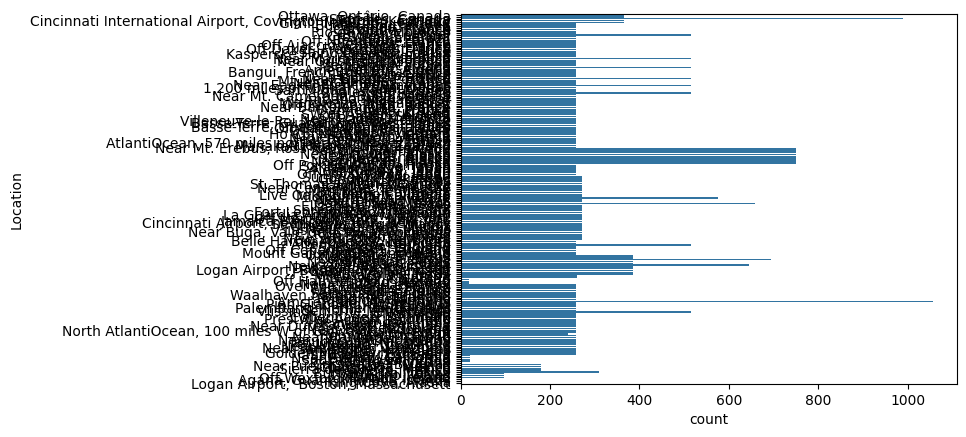

In [185]:
sns.countplot(final_air_data['Location'])

In [186]:
final_air_data['Location'] = final_air_data['Location'].str.replace(r'[^A-Za-z0-9]+','',regex=True)

In [187]:
final_air_data['Location'].value_counts()

Location
AmsterdamNetherlands       1056
TorontoCanada               990
NearNomeAlaska              751
NearMcGrathAlaska           751
KetchikanAlaska             751
                           ... 
OsloNorway                   20
OffHafnarfjorourIceland      20
AganaGuamMarianaIslands       3
KingCoveAlaska                3
CarswellAFBTexas              2
Name: count, Length: 203, dtype: int64

In [189]:
final_air_data['Operator'].unique()

array([nan, 'AirCanada', 'AirChina', 'AirFrance', 'AirNewZealand',
       'AlaskaAirlines', 'AllNipponAirways', 'AmericanAirlines',
       'AsianaAirlines', 'BritishAirways', 'DeltaAirLines',
       'FrontierAirlines', 'Icelandair', 'KLMRoyalDutchAirlines',
       'NorthwestAirlines', 'SingaporeAirlines', 'TACA', 'USAirways',
       'Ameriflight', 'EvergreenInternationalAirlines', 'Aeromexico',
       'SouthwestAirlines', 'AerLingus', 'WorldAirways',
       'TurkishAirlines'], dtype=object)

In [192]:
final_air_data['Flight #'] = final_air_data['Flight #'].str.replace('/','')
final_air_data['Flight #'] = final_air_data['Flight #'].str.replace('-','')

In [232]:
final_air_data['Route'] = final_air_data['Route'].str.replace('r[^A-Za-z]+','',regex=True)
final_air_data['Route'] = final_air_data['Route'].str.replace('-','')
final_air_data['Route'] = final_air_data['Route'].str.replace('/','')
final_air_data['Route'] = final_air_data['Route'].str.replace('(','')
final_air_data['Route'] = final_air_data['Route'].str.replace(')','')
final_air_data['Route'] = final_air_data['Route'].str.replace('.','')
final_air_data['Route'] = final_air_data['Route'].str.replace(',','')

In [227]:
final_air_data['Type'] = final_air_data['Type'].str.replace('r[^A-Za-z]+','',regex=True)
final_air_data['Type'] = final_air_data['Type'].str.replace('-','')
final_air_data['Type'] = final_air_data['Type'].str.replace('/','')
final_air_data['Type'] = final_air_data['Type'].str.replace('(','')
final_air_data['Type'] = final_air_data['Type'].str.replace(')','')
final_air_data['Type'] = final_air_data['Type'].str.replace('.','')
final_air_data['Type'] = final_air_data['Type'].str.replace('é','')
final_air_data['Type'] = final_air_data['Type'].str.replace('è','')

In [207]:
final_air_data['Registration'] = final_air_data['Registration'].str.replace('r[^A-Za-z0-9]+','',regex=True)

In [216]:
final_air_data['Registration'] = final_air_data['Registration'].str.replace('-','')

In [218]:
final_air_data['Registration'] = final_air_data['Registration'].str.replace('/','')

In [234]:
final_air_data['cn/In'] = final_air_data['cn/In'].str.replace('-','')
final_air_data['cn/In'] = final_air_data['cn/In'].str.replace('/','')
final_air_data['cn/In'] = final_air_data['cn/In'].str.replace('(','')
final_air_data['cn/In'] = final_air_data['cn/In'].str.replace(')','')
final_air_data['cn/In'] = final_air_data['cn/In'].str.replace('.','')
final_air_data['cn/In'] = final_air_data['cn/In'].str.replace(',','')

In [235]:
final_air_data['cn/In'].unique()

array([nan, '45653178', '271', '46114526', '47197', '47196278', '2252047',
       '23308127', '01', '925', '8', '906', '19', '1', '02', '4213', '11',
       '05', '403112', '7372', '25', '22', '2', '12', '403', '2380',
       'AAC020', '11714', '42975', '25251', '20488', 'AAC136', '091',
       '42972', '06', '2546', '10391', '42937', '42990', '42992', '42971',
       '106', '43', '090', '2628', '2674', '4509', '1441125856', '4514',
       '20001', '4622', '1027', '068', '17920159', '18247274', '11769',
       '19724', '244', '18459335', '83', '009', '104', '216221431', '203',
       '289', '660', '45751231', '10456', '46910182', '7453', '20208',
       '1397725422', 'FK975', '27239', '45243919', '19304287', '18821',
       '530771995', '7336', '6006', '444', '18822126', '2023', '1307',
       '2207', '1552', '1588', '2166', '2215', '2138', '2203', '4805',
       '19639', '10314DC45', '4304692', '4289558', '054', '116', '066',
       '040', '1015', '1764136', '176298', '1763312', '1890

In [237]:
final_air_data['Month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'April',
       'December', 'January', 'February', 'March', 'May', 'June'],
      dtype=object)

In [238]:
final_air_data['Month'] = final_air_data['Month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,
                                                       'June':6,'July':7,'August':8,'September':9,'October':10, 
                                                       'November':11,'December':12}).astype(int)

In [239]:
final_air_data['Month'].unique()

array([ 7,  8,  9, 10, 11,  4, 12,  1,  2,  3,  5,  6])

In [241]:
final_air_data['Date'].unique()

array([nan, '18:37', '08:09', '08:08', '19:20', '19:30', '11:23', '18:15',
       '05:00', '06:00', '10:47', '17:30', '09:15', '14:00', '23:00',
       '02:50', '16:45', '21:52', '21:55', '09:25', '08:10', '02:28',
       '09:00', '19:24', '06:50', '02:30', '22:09', '12:35', '04:01',
       '20:32', '10:30', '14:45', '17:00', '16:47', '16:44', '16:04',
       '00:15', '15:59', '14:35', '12:49', '14:25', '20:05', '15:40',
       '18:25', '17:19', '02:11', '11:15', '08:19', '16:21', '19:00',
       '20:30', '11:25', '02:52', '19:32', '19:10', '22:10', '22:43',
       '23:17', '23:36', '04:10', '02:25', '08:12', '09:19', '18:49',
       '07:55', '05:49', '15:43', '08:34', '22:36', '12:23', '00:01',
       '23:56', '16:42', "12'20", '10:09', '19:02', '15:10', '15:04',
       '12:00', '11:37', '21:38', '23:50', '12:22', '09:45', '08:47',
       '09:16', '15:48', '20:44', '07:33', '12:43', '23:45', '10:40',
       '22:58', '14:15', '11:52', '00:45', '06:24', '10:08', '18:06',
       '09:01',

**Feature Engineering**

In [252]:
final_air_data['Date'] = pd.to_datetime(final_air_data['Date'], format = '%m/%d/%Y', errors='coerce')

In [ ]:
final_air_data['Crash Month'] = final_air_data['Date'].dt.month

In [256]:
final_air_data['Crash Year'] = final_air_data['Date'].dt.year

In [257]:
final_air_data['Crash Day'] = final_air_data['Date'].dt.day

In [259]:
final_air_data.drop('Date',axis=1,inplace=True)

In [266]:
final_air_data['Time'] = temp['Time']

In [333]:
final_air_data['Time'] = final_air_data['Time'].fillna(0)

In [334]:
final_air_data['Time'] = pd.to_datetime(final_air_data['Time'], format='%H:%M:%S', errors='coerce')

In [335]:
final_air_data['Time in minutes'] = ((final_air_data['Time'].dt.hour * 60) + temp['Time'].dt.minute)

In [337]:
final_air_data['Time in minutes'].fillna(0)

0           0.0
1           0.0
2           0.0
3        1117.0
4           0.0
          ...  
70275       0.0
70276       0.0
70277       0.0
70278       0.0
70279       0.0
Name: Time in minutes, Length: 70280, dtype: float64

In [338]:
final_air_data.drop('Time',axis=1,inplace=True)

In [339]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70280 non-null  object 
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  int32  
 5   Activity Type Code           70280 non-null  int32  
 6   Price Category Code          70280 non-null  int32  
 7   Terminal                     70280 non-null  int32  
 8   Boarding Area                70280 non-null  int32  
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  int32  
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

In [304]:
final_air_data.duplicated().value_counts()

False    70280
Name: count, dtype: int64

**Observation:** No Duplicate values

**Handling Null Values**

In [345]:
final_air_data['Aboard'].describe()

count    59802.000000
mean        47.577372
std         66.650763
min          1.000000
25%          6.000000
50%         21.000000
75%         63.000000
max        517.000000
Name: Aboard, dtype: float64

In [346]:
final_air_data['Aboard'].median()

21.0

In [347]:
final_air_data['Aboard'] = final_air_data['Aboard'].fillna(final_air_data['Aboard'].median())

In [348]:
final_air_data['Aboard'].describe()

count    70280.000000
mean        43.614969
std         62.206290
min          1.000000
25%          6.000000
50%         21.000000
75%         52.000000
max        517.000000
Name: Aboard, dtype: float64

In [342]:
final_air_data['Aboard'].isnull().sum()

10478

In [349]:
final_air_data['Fatalities'].describe()

count    60576.000000
mean        26.748151
std         45.228358
min          0.000000
25%          2.000000
50%          6.000000
75%         28.000000
max        271.000000
Name: Fatalities, dtype: float64

In [350]:
final_air_data['Ground'].describe()

count    60318.000000
mean        13.184754
std        184.394648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2750.000000
Name: Ground, dtype: float64

In [351]:
final_air_data['Fatalities'] = final_air_data['Fatalities'].fillna(final_air_data['Fatalities'].median())
final_air_data['Ground'] = final_air_data['Ground'].fillna(final_air_data['Ground'].median())

In [352]:
final_air_data['Fatalities'].describe()

count    70280.000000
mean        23.883324
std         42.595590
min          0.000000
25%          3.000000
50%          6.000000
75%         23.000000
max        271.000000
Name: Fatalities, dtype: float64

In [353]:
final_air_data['Ground'].describe()

count    70280.000000
mean        11.315851
std        170.888448
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2750.000000
Name: Ground, dtype: float64

In [356]:
final_air_data['Crash Month'] = final_air_data['Crash Month'].fillna(final_air_data['Crash Month'].mean())

In [357]:
final_air_data['Crash Month'].isnull().sum()

0

<Axes: ylabel='Crash Year'>

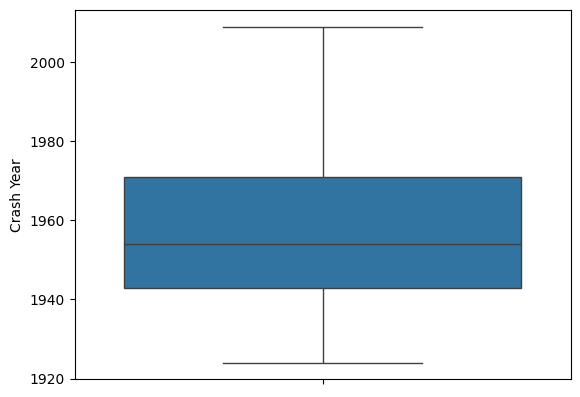

In [360]:
sns.boxplot(final_air_data['Crash Year'])

In [362]:
final_air_data['Crash Year'] = final_air_data['Crash Year'].fillna(final_air_data['Crash Year'].mean())

In [363]:
final_air_data['Crash Year'].isnull().sum()

0

<Axes: ylabel='Crash Day'>

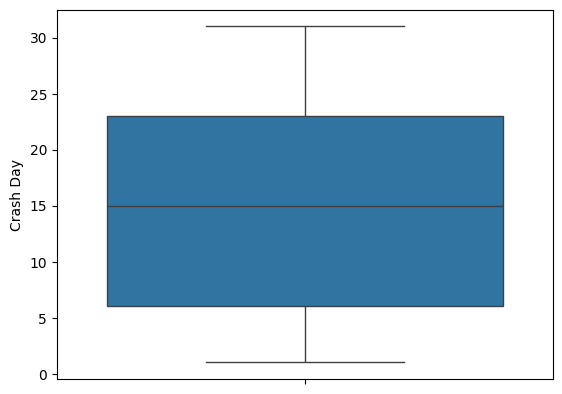

In [359]:
sns.boxplot(final_air_data['Crash Day'])

In [365]:
final_air_data['Crash Day'] = final_air_data['Crash Day'].fillna(final_air_data['Crash Day'].mean())

In [366]:
final_air_data['Crash Day'].isnull().sum()

0

<Axes: ylabel='Time in minutes'>

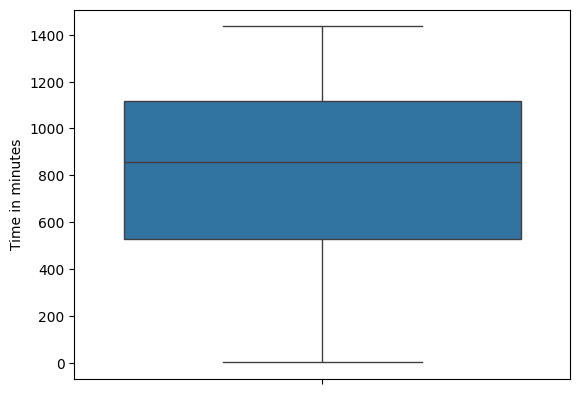

In [367]:
sns.boxplot(final_air_data['Time in minutes'])

In [369]:
final_air_data['Time in minutes'] = final_air_data['Time in minutes'].fillna(final_air_data['Time in minutes'].mean())

In [370]:
final_air_data['Time in minutes'].isnull().sum()

0

In [371]:
final_air_data['Location'] = final_air_data['Location'].fillna(final_air_data['Location'].mode()[0])
final_air_data['Operator'] = final_air_data['Operator'].fillna(final_air_data['Operator'].mode()[0])
final_air_data['Flight #'] = final_air_data['Flight #'].fillna(final_air_data['Flight #'].mode()[0])
final_air_data['Route'] = final_air_data['Route'].fillna(final_air_data['Route'].mode()[0])
final_air_data['Type'] = final_air_data['Type'].fillna(final_air_data['Type'].mode()[0])
final_air_data['Registration'] = final_air_data['Registration'].fillna(final_air_data['Registration'].mode()[0])
final_air_data['cn/In'] = final_air_data['cn/In'].fillna(final_air_data['cn/In'].mode()[0])

In [372]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  object 
 2   Operating Airline IATA Code  70280 non-null  object 
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  int32  
 5   Activity Type Code           70280 non-null  int32  
 6   Price Category Code          70280 non-null  int32  
 7   Terminal                     70280 non-null  int32  
 8   Boarding Area                70280 non-null  int32  
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  int32  
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

**Encoding**

In [373]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [374]:
le=LabelEncoder()

In [375]:
final_air_data['Operating Airline'] = le.fit_transform(final_air_data['Operating Airline'])
final_air_data['Operating Airline IATA Code'] = le.fit_transform(final_air_data['Operating Airline IATA Code'])
final_air_data['Location'] = le.fit_transform(final_air_data['Location'])
final_air_data['Operator'] = le.fit_transform(final_air_data['Operator'])
final_air_data['Flight #'] = le.fit_transform(final_air_data['Flight #'])
final_air_data['Route'] = le.fit_transform(final_air_data['Route'])
final_air_data['Type'] = le.fit_transform(final_air_data['Type'])
final_air_data['Registration'] = le.fit_transform(final_air_data['Registration'])
final_air_data['cn/In'] = le.fit_transform(final_air_data['cn/In'])


In [377]:
final_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70280 entries, 0 to 70279
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              70280 non-null  int64  
 1   Operating Airline            70280 non-null  int32  
 2   Operating Airline IATA Code  70280 non-null  int32  
 3   GEO Summary                  70280 non-null  int64  
 4   GEO Region                   70280 non-null  int32  
 5   Activity Type Code           70280 non-null  int32  
 6   Price Category Code          70280 non-null  int32  
 7   Terminal                     70280 non-null  int32  
 8   Boarding Area                70280 non-null  int32  
 9   Passenger Count              70280 non-null  int64  
 10  Adjusted Activity Type Code  70280 non-null  int32  
 11  Adjusted Passenger Count     70280 non-null  int64  
 12  Year                         70280 non-null  int64  
 13  Month           

**Working on Outliers**

<Axes: ylabel='Ground'>

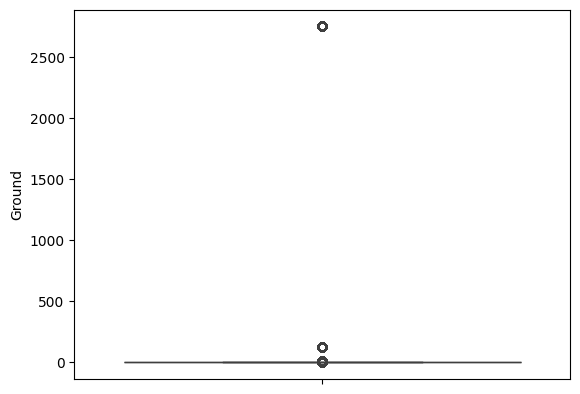

In [62]:
sns.boxplot(final_air_data['Ground'])

**Observations:** Outliers are present in Operating Airline, Operating Airline IATA Code, GEO Region(1 outlier), Price Category Code(1 outlier), Terminal, Boarding Area, Passenger Count, Adjusted Passenger Count, Operator, Aboard, Fatalities, Ground

<Axes: ylabel='Operating Airline'>

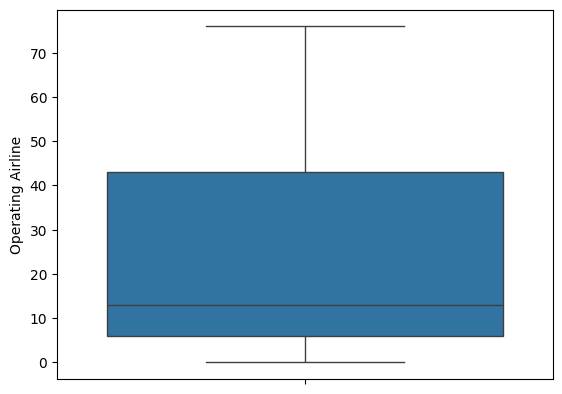

In [378]:
sns.boxplot(final_air_data['Operating Airline'])

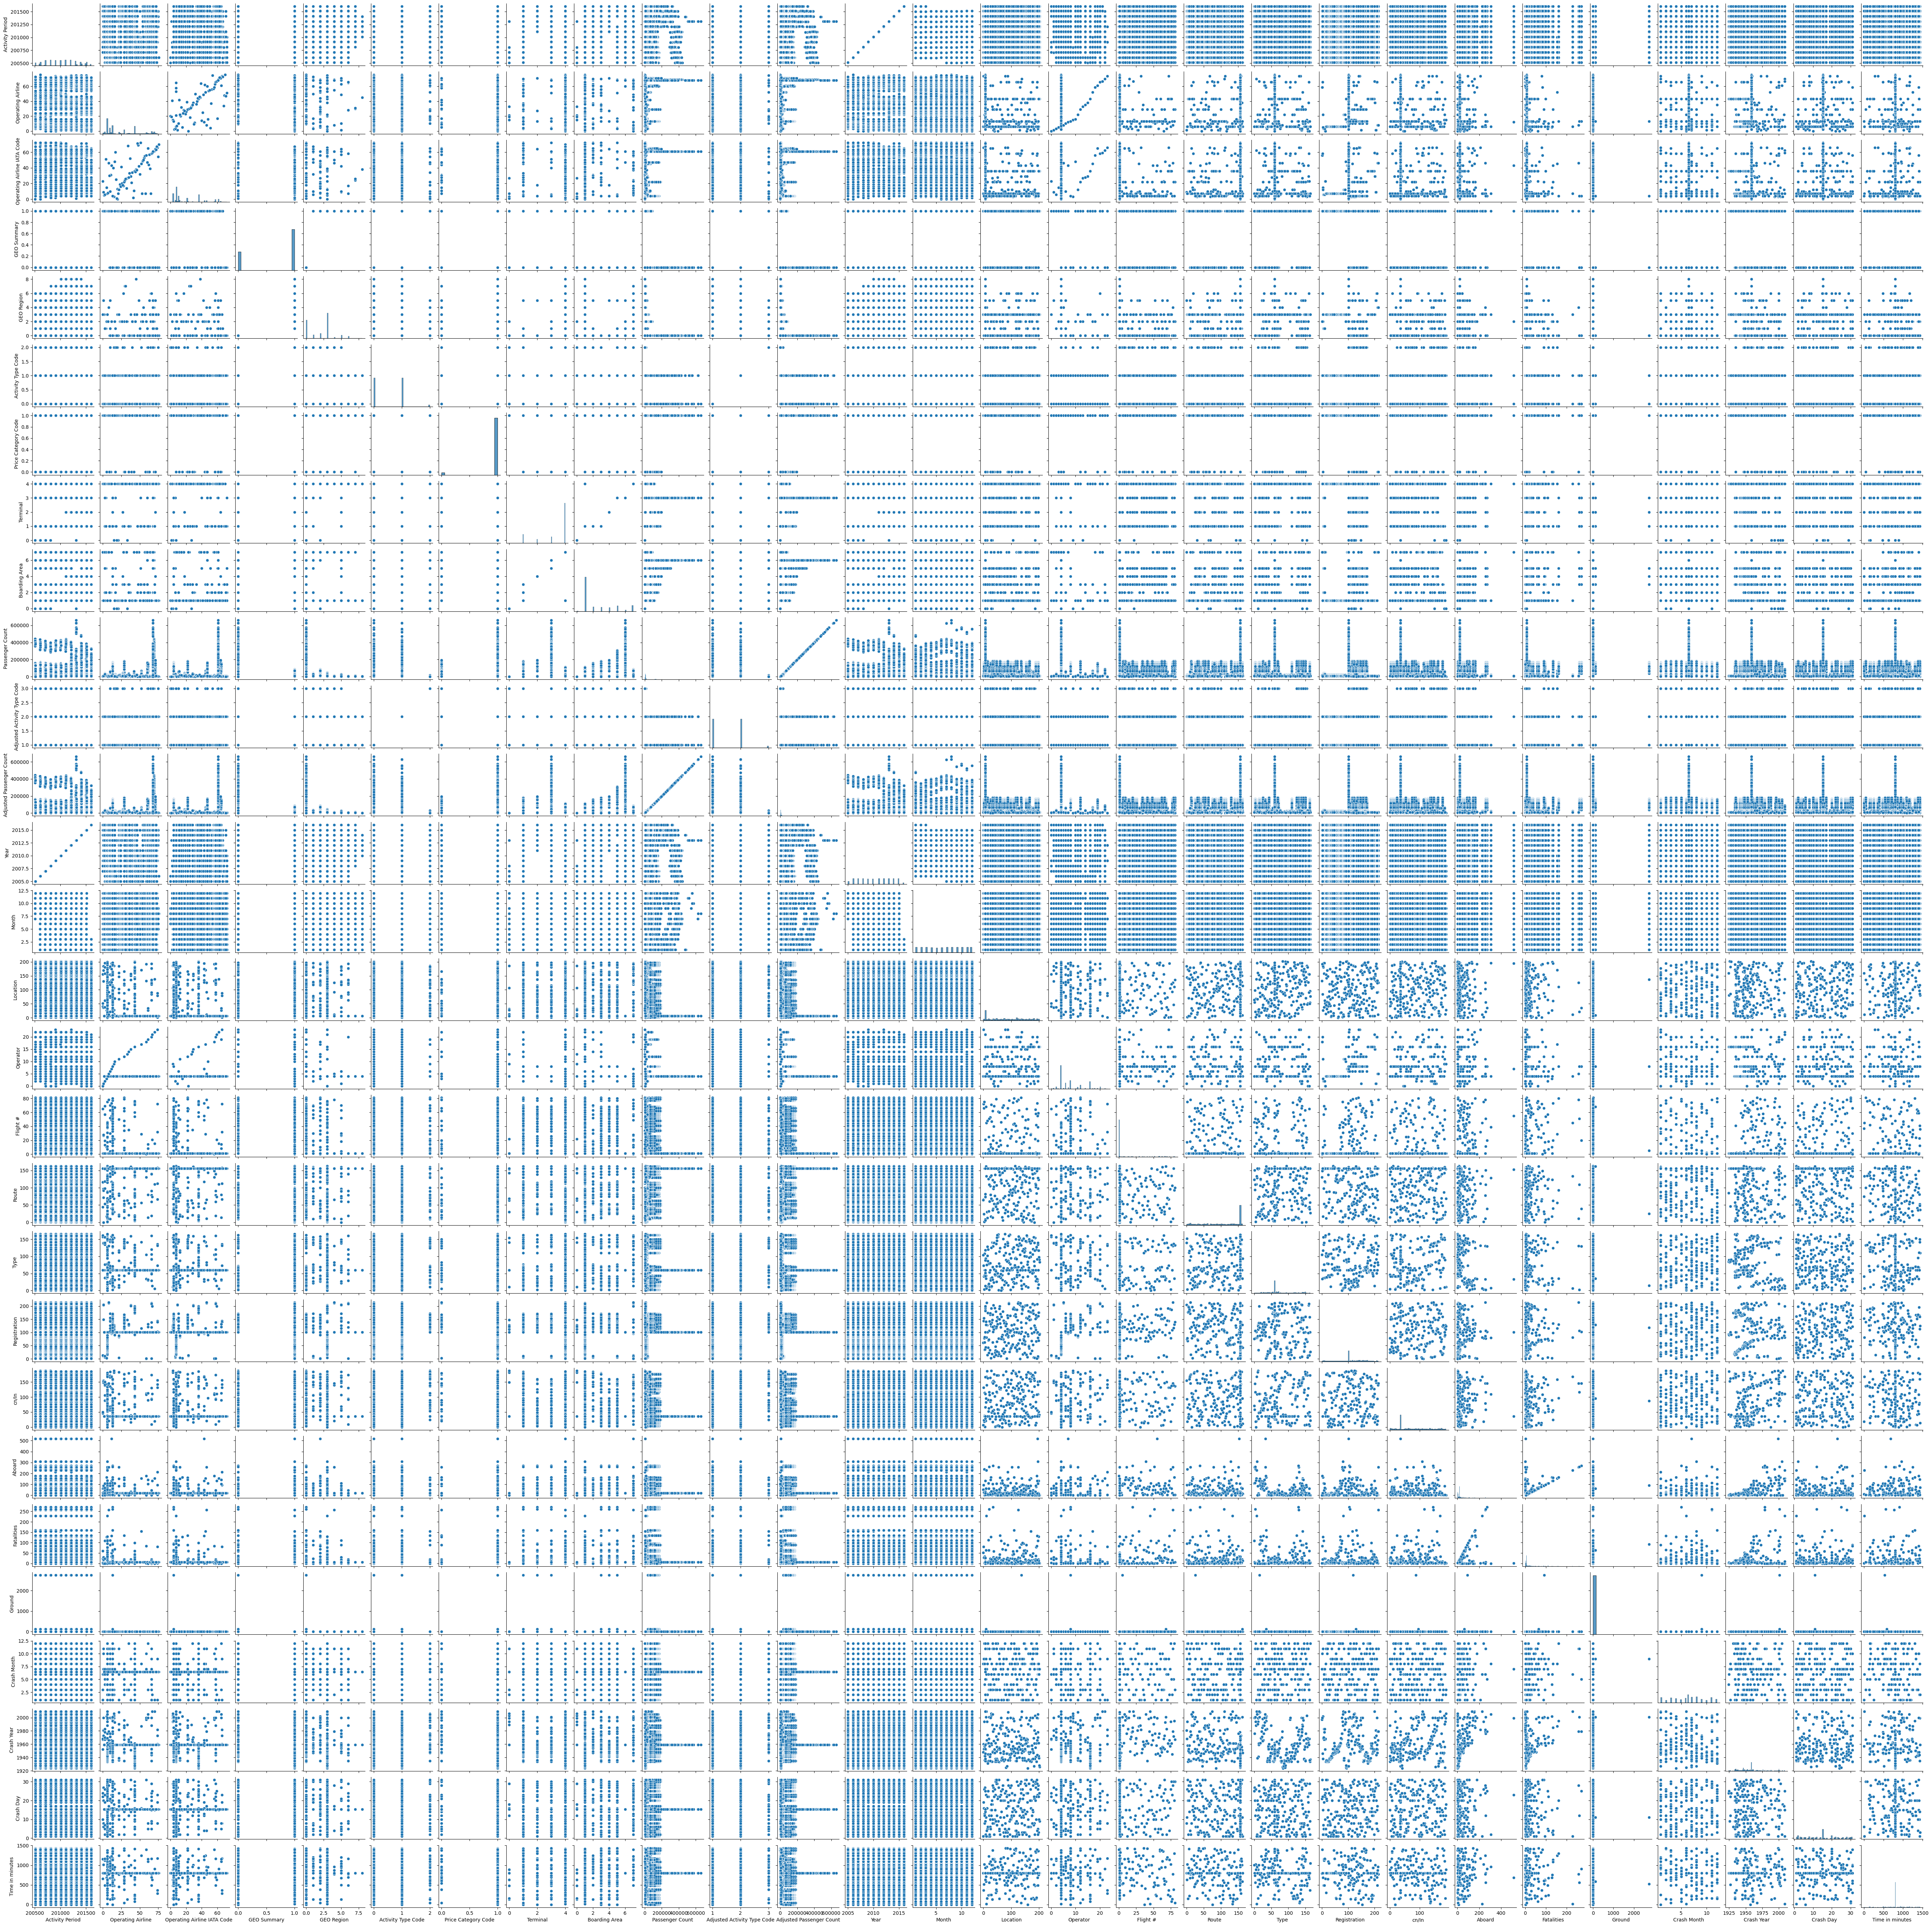

In [379]:
sns.pairplot(final_air_data, height=2)

<Axes: ylabel='Operating Airline IATA Code'>

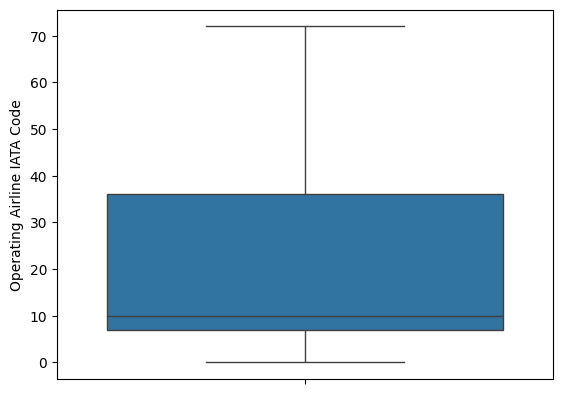

In [380]:
sns.boxplot(final_air_data['Operating Airline IATA Code'])

<Axes: ylabel='GEO Region'>

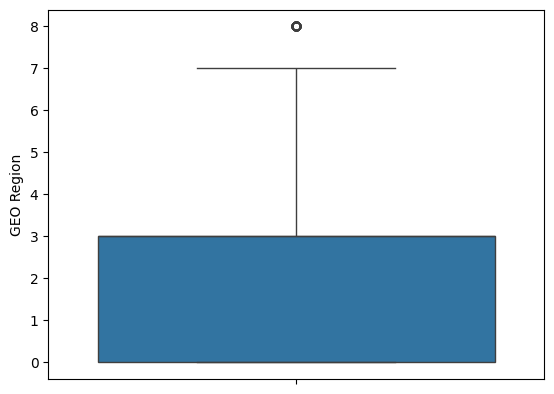

In [381]:
sns.boxplot(final_air_data['GEO Region'])

In [382]:
final_air_data['GEO Region'].value_counts()

GEO Region
3    30193
0    21836
2     5921
1     4120
5     4055
6     2596
4     1255
7      214
8       90
Name: count, dtype: int64

In [383]:
final_air_data['GEO Region'].describe()

count    70280.000000
mean         2.129055
std          1.737343
min          0.000000
25%          0.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: GEO Region, dtype: float64

In [385]:
final_air_data['GEO Region'] = final_air_data['GEO Region'].replace(8,final_air_data['GEO Region'].mode()[0])

<Axes: ylabel='GEO Region'>

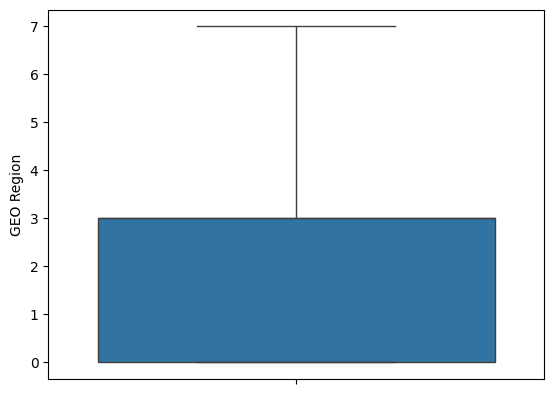

In [386]:
sns.boxplot(final_air_data['GEO Region'])

<Axes: ylabel='Price Category Code'>

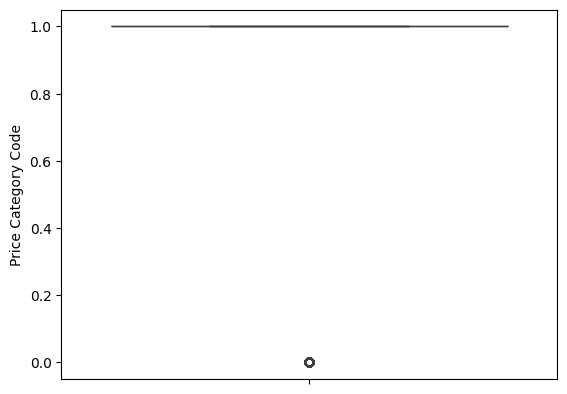

In [387]:
sns.boxplot(final_air_data['Price Category Code'])

In [388]:
final_air_data['Price Category Code'].value_counts()

Price Category Code
1    67611
0     2669
Name: count, dtype: int64

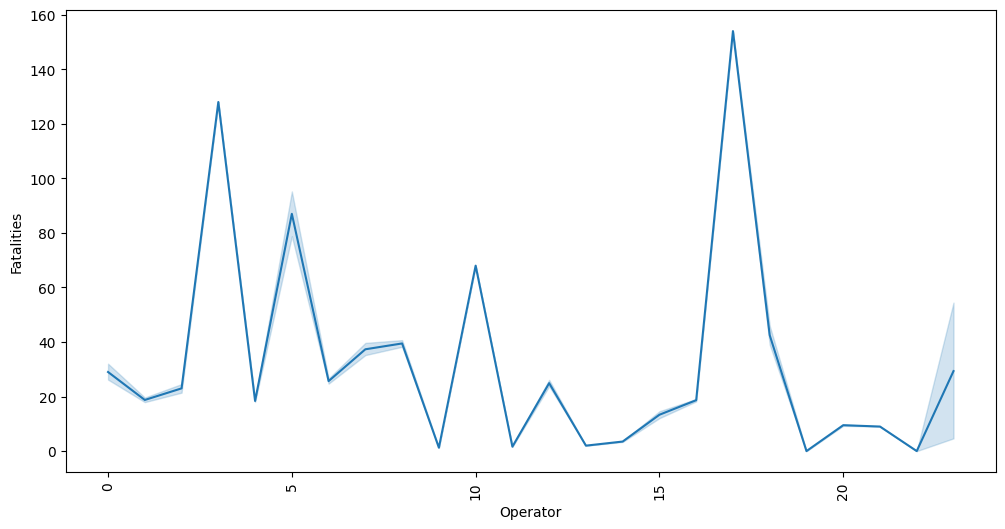

In [391]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Operator', y='Fatalities', data=final_air_data)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Boarding Area'>

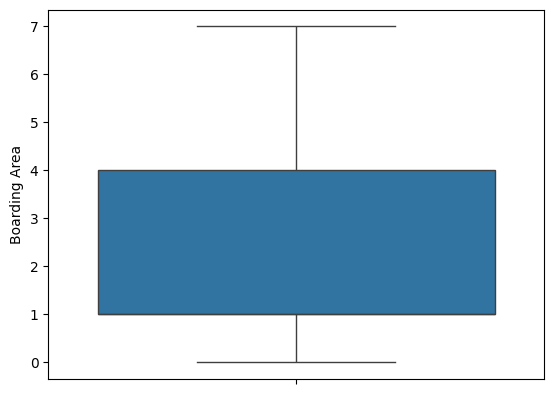

In [392]:
sns.boxplot(final_air_data['Boarding Area'])

<Axes: ylabel='Passenger Count'>

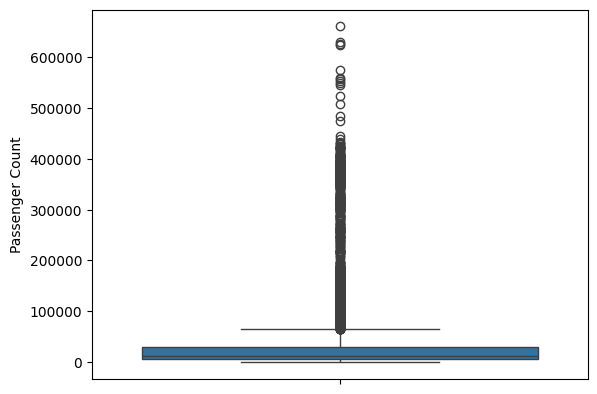

In [393]:
sns.boxplot(final_air_data['Passenger Count'])

<Axes: ylabel='Adjusted Passenger Count'>

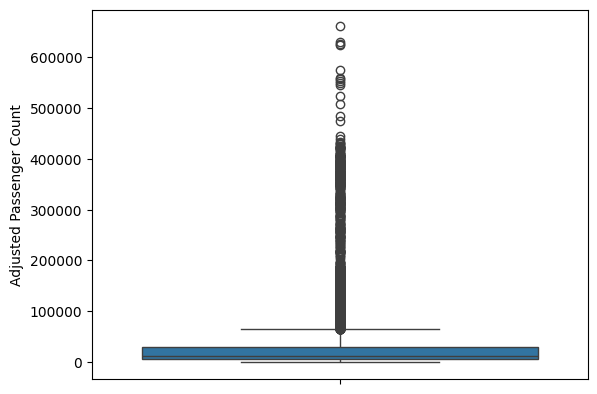

In [394]:
sns.boxplot(final_air_data['Adjusted Passenger Count'])

<Axes: ylabel='Operator'>

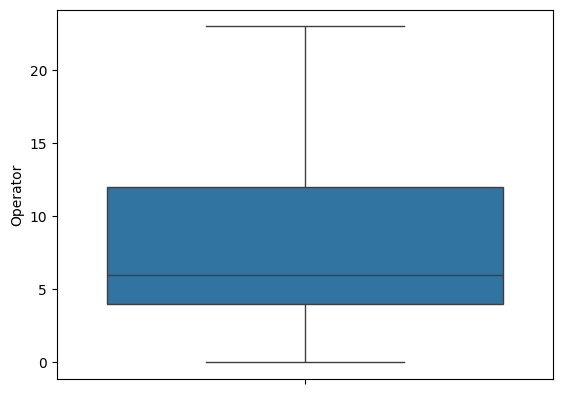

In [395]:
sns.boxplot(final_air_data['Operator'])

<Axes: ylabel='Aboard'>

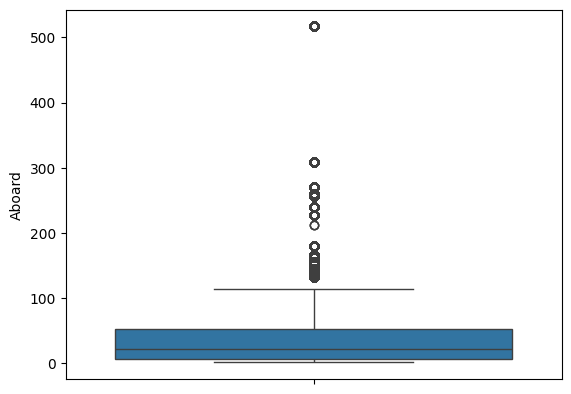

In [396]:
sns.boxplot(final_air_data['Aboard'])

<Axes: ylabel='Fatalities'>

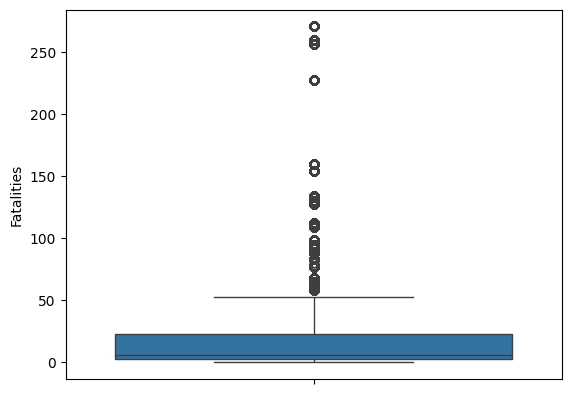

In [397]:
sns.boxplot(final_air_data['Fatalities'])

<Axes: ylabel='Ground'>

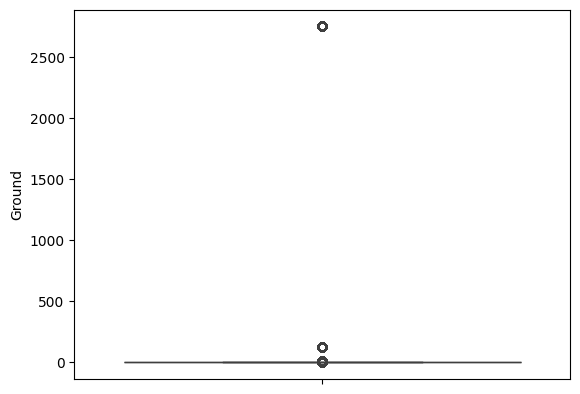

In [398]:
sns.boxplot(final_air_data['Ground'])

In [399]:
final_air_data['Ground'].value_counts()

Ground
0.0       65894
1.0        1704
2.0         770
4.0         438
13.0        386
7.0         272
125.0       272
2750.0      272
5.0         272
Name: count, dtype: int64

In [400]:
final_air_data['Ground'].describe()

count    70280.000000
mean        11.315851
std        170.888448
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2750.000000
Name: Ground, dtype: float64

In [402]:
final_air_data['Ground'] = final_air_data['Ground'].replace(2750.0, final_air_data['Ground'].median())

In [403]:
final_air_data['Ground'] = final_air_data['Ground'].replace(125.0, final_air_data['Ground'].median())

In [404]:
final_air_data['Ground'] = final_air_data['Ground'].replace(7.0, final_air_data['Ground'].mean())
final_air_data['Ground'] = final_air_data['Ground'].replace(5.0, final_air_data['Ground'].mean())

In [ ]:
'Passenger Count', 'Adjusted Passenger Count', 'Fatalities', 'Aboard'

In [405]:
final_air_data['Aboard'].value_counts()

Aboard
21.0     11632
2.0       4145
6.0       3725
5.0       3597
3.0       3044
         ...  
66.0       180
18.0       180
134.0       24
94.0         3
212.0        3
Name: count, Length: 93, dtype: int64

C:\Users\bhava\AppData\Local\Temp\ipykernel_41448\1939549659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_air_data['Aboard'])


<Axes: xlabel='Aboard', ylabel='Density'>

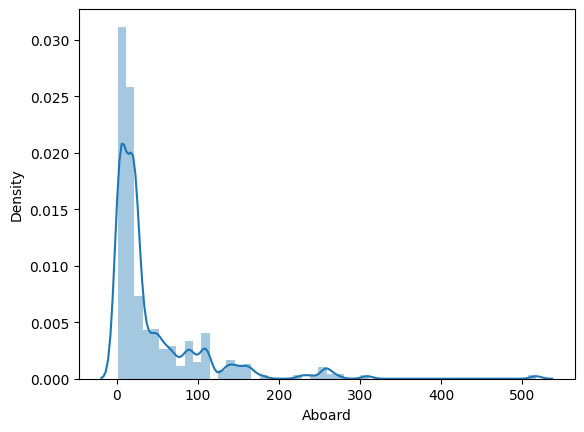

In [407]:
sns.distplot(final_air_data['Aboard'])

In [408]:
mean = final_air_data['Aboard'].mean()
std = final_air_data['Aboard'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)


Lower Bound:  -80.7976104528218
Upper Bound:  168.02754784610582


In [409]:
final_air_data.loc[final_air_data['Aboard']>168.0,'Aboard']=168.0

Text(0, 0.5, 'Count')

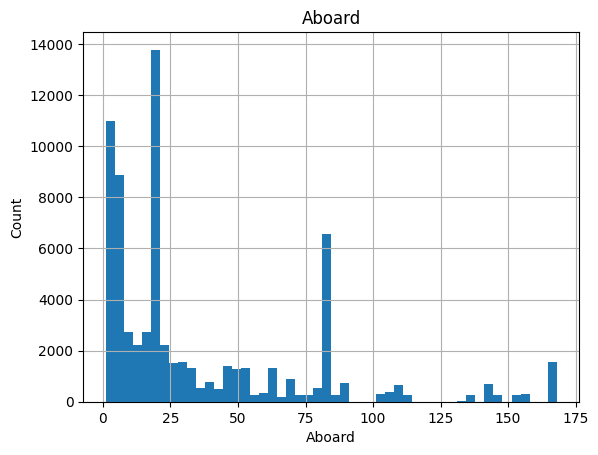

In [419]:
figure = final_air_data.Aboard.hist(bins=50)
figure.set_title('Aboard')
figure.set_xlabel('Aboard')
figure.set_ylabel('Count')

The Outliers in Aboard are handled now.

Text(0, 0.5, 'Count')

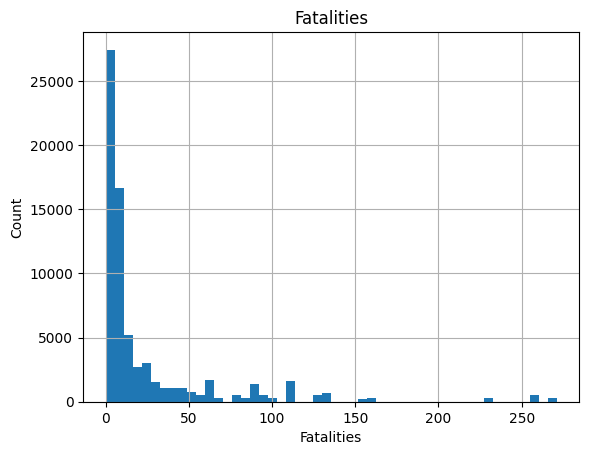

In [412]:
figure = final_air_data.Fatalities.hist(bins=50)
figure.set_title('Fatalities')
figure.set_xlabel('Fatalities')
figure.set_ylabel('Count')

The data is Skewed distribution

In [413]:
IQR = final_air_data.Fatalities.quantile(0.75) - final_air_data.Fatalities.quantile(0.25)

In [414]:
##Extreme Outliers

lower_bridge = final_air_data['Fatalities'].quantile(0.25) - (IQR*3)
upper_bridge = final_air_data['Fatalities'].quantile(0.75) + (IQR*3)
print(lower_bridge, upper_bridge)

-57.0 83.0


In [417]:
final_air_data.loc[final_air_data['Fatalities']>83.0,'Fatalities']=83.0

Text(0, 0.5, 'Count')

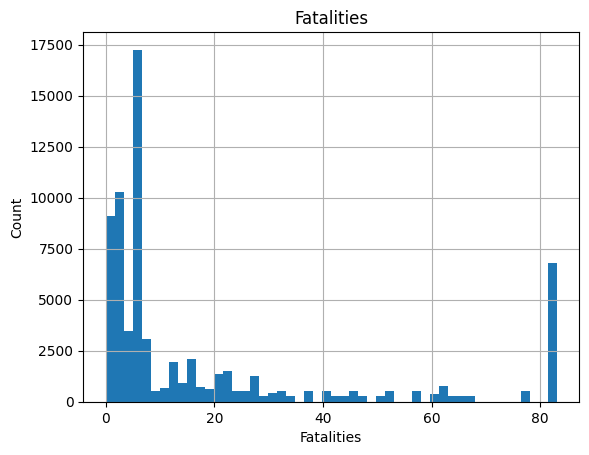

In [427]:
figure = final_air_data.Fatalities.hist(bins=50)
figure.set_title('Fatalities')
figure.set_xlabel('Fatalities')
figure.set_ylabel('Count')

In [439]:
final_air_data.loc[final_air_data['Fatalities']==83.0,'Fatalities']=final_air_data['Fatalities'].median()

Text(0, 0.5, 'Count')

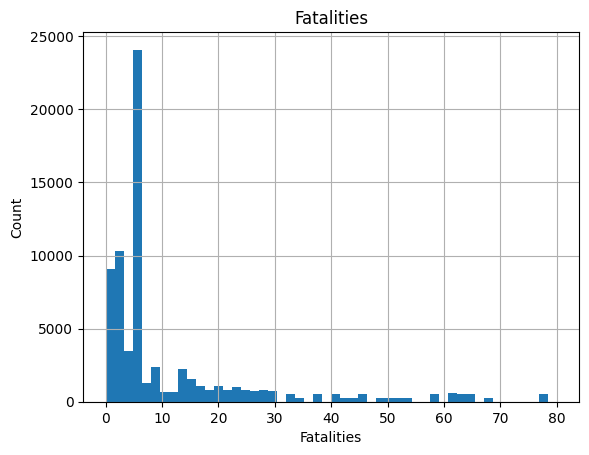

In [440]:
figure = final_air_data.Fatalities.hist(bins=50)
figure.set_title('Fatalities')
figure.set_xlabel('Fatalities')
figure.set_ylabel('Count')

The outliers in Fatalities are handled now

Text(0, 0.5, 'Count')

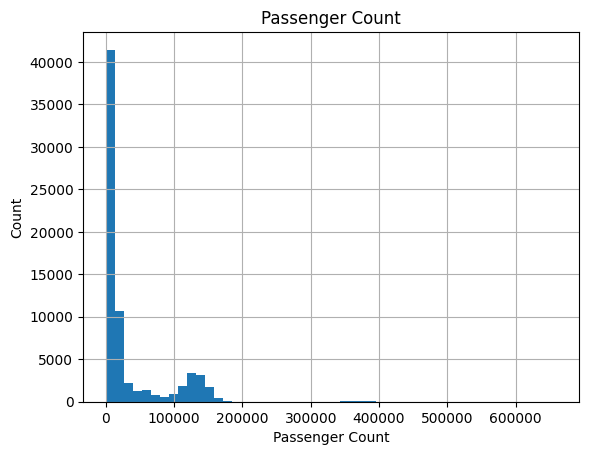

In [422]:
figure = final_air_data['Passenger Count'].hist(bins=50)
figure.set_title('Passenger Count')
figure.set_xlabel('Passenger Count')
figure.set_ylabel('Count')

In [423]:
IQR = final_air_data['Passenger Count'].quantile(0.75) - final_air_data['Passenger Count'].quantile(0.25)

In [424]:
##Extreme Outliers

lower_bridge = final_air_data['Passenger Count'].quantile(0.25) - (IQR*3)
upper_bridge = final_air_data['Passenger Count'].quantile(0.75) + (IQR*3)
print(lower_bridge, upper_bridge)

-64504.0 102012.0


In [428]:
final_air_data.loc[final_air_data['Passenger Count']>102012.0,'Passenger Count']=102012.0

Text(0, 0.5, 'Count')

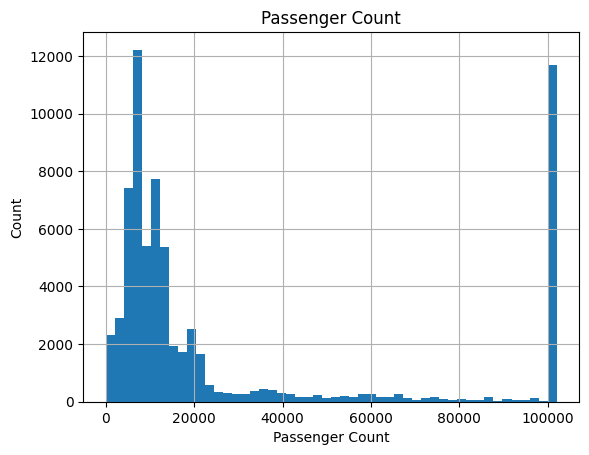

In [429]:
figure = final_air_data['Passenger Count'].hist(bins=50)
figure.set_title('Passenger Count')
figure.set_xlabel('Passenger Count')
figure.set_ylabel('Count')

In [441]:
final_air_data.loc[final_air_data['Passenger Count']==102012.0,'Passenger Count']=final_air_data['Passenger Count'].median()

Text(0, 0.5, 'Count')

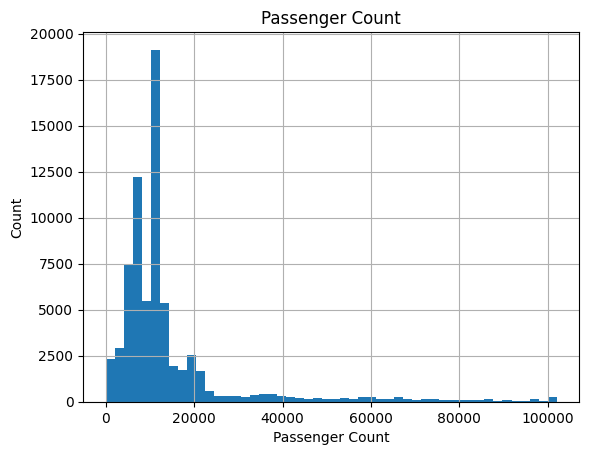

In [442]:
figure = final_air_data['Passenger Count'].hist(bins=50)
figure.set_title('Passenger Count')
figure.set_xlabel('Passenger Count')
figure.set_ylabel('Count')

The outliers in passenger Count are handled now

Text(0, 0.5, 'Count')

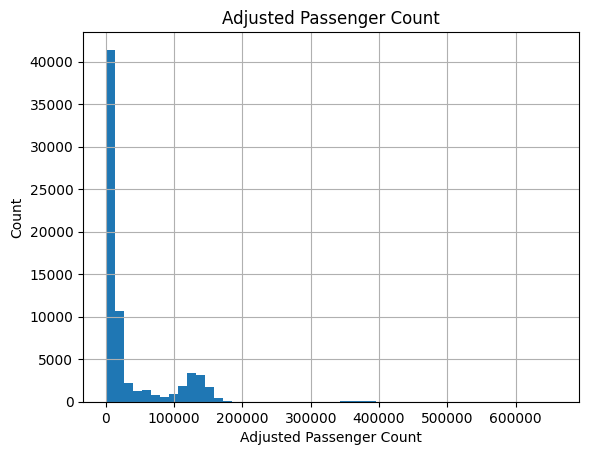

In [430]:

figure = final_air_data['Adjusted Passenger Count'].hist(bins=50)
figure.set_title('Adjusted Passenger Count')
figure.set_xlabel('Adjusted Passenger Count')
figure.set_ylabel('Count')

In [431]:
IQR = final_air_data['Adjusted Passenger Count'].quantile(0.75) - final_air_data['Adjusted Passenger Count'].quantile(0.25)

In [432]:
##Extreme Outliers

lower_bridge = final_air_data['Adjusted Passenger Count'].quantile(0.25) - (IQR*3)
upper_bridge = final_air_data['Adjusted Passenger Count'].quantile(0.75) + (IQR*3)
print(lower_bridge, upper_bridge)

-64324.0 101877.0


In [433]:
final_air_data.loc[final_air_data['Adjusted Passenger Count']>101877.0,'Adjusted Passenger Count']=101877.0

Text(0, 0.5, 'Count')

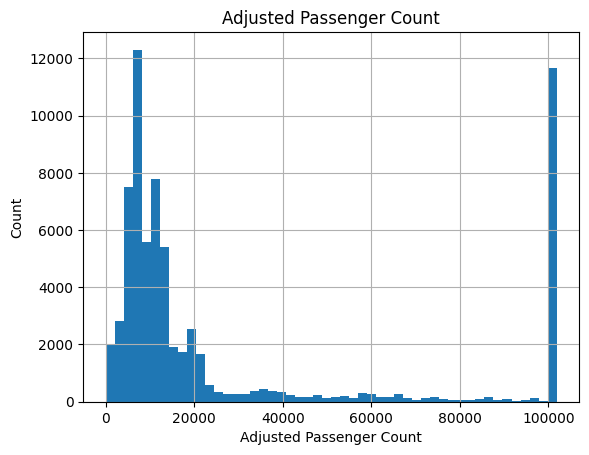

In [434]:
figure = final_air_data['Adjusted Passenger Count'].hist(bins=50)
figure.set_title('Adjusted Passenger Count')
figure.set_xlabel('Adjusted Passenger Count')
figure.set_ylabel('Count')

In [443]:
final_air_data.loc[final_air_data['Adjusted Passenger Count']==101877.0,'Adjusted Passenger Count']=final_air_data['Adjusted Passenger Count'].median()

Text(0, 0.5, 'Count')

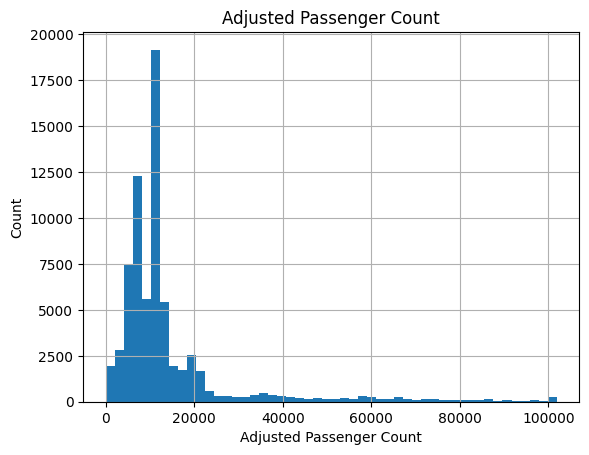

In [444]:
figure = final_air_data['Adjusted Passenger Count'].hist(bins=50)
figure.set_title('Adjusted Passenger Count')
figure.set_xlabel('Adjusted Passenger Count')
figure.set_ylabel('Count')

The Outliers in "Adjusted Passenger Count" are handled now

## Machine Learning Model

In [455]:
print(type(x))
print(type(y))

<class 'NoneType'>
<class 'pandas.core.series.Series'>


In [453]:
final_air_data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'GEO Summary', 'GEO Region', 'Activity Type Code',
       'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count',
       'Adjusted Activity Type Code', 'Adjusted Passenger Count', 'Year',
       'Month', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Ground', 'Crash Month',
       'Crash Year', 'Crash Day', 'Time in minutes'],
      dtype='object')

In [456]:
from sklearn.model_selection import train_test_split

x = final_air_data

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [457]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [460]:
y_pred = linreg.predict(X_test)

In [462]:
from sklearn.metrics import mean_squared_error, r2_score

#Y_pred = linreg.predict(X_train)
print("R² score:", r2_score(y_pred, Y_test))
print("Mean Squared Error:", mean_squared_error(y_pred, Y_test))

R² score: -4.195599020125263
Mean Squared Error: 198.77035183457772


In [464]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [463]:
from sklearn.linear_model import Ridge, Lasso


In [465]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, Y_train)
Y_pred = ridge_model.predict(X_test_scaled)

In [466]:
mse_ridge = mean_squared_error(Y_test, Y_pred)

In [467]:
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

Ridge Regression Mean Squared Error: 198.75941511198997


In [468]:
print("R² score:", r2_score(Y_pred, Y_test))

R² score: -4.197760174937519


In [469]:
from sklearn.linear_model import RidgeCV

r_cv = RidgeCV(alphas=[0.1, 1, 10, 100], store_cv_values=True)
r_cv.fit(X_train, Y_train)

# Best alpha found
print(f"Best alpha: {r_cv.alpha_}")

# Predictions and evaluation
Y_pred = r_cv.predict(X_test)
mse_r_cv = mean_squared_error(Y_test, Y_pred)
print(f"Ridge Regression (CV) Mean Squared Error: {mse_r_cv}")


C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Best alpha: 100.0
Ridge Regression (CV) Mean Squared Error: 198.77016496400435


In [472]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, Y_train)

# Predict on the test set
Y_pred = lasso.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse_lasso = mean_squared_error(Y_test, Y_pred)

C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+05, tolerance: 1.333e+03
  model = cd_fast.enet_coordinate_descent(


In [473]:
mse_lasso

233.1835504721559

In [474]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)


C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [475]:
Y_pred = logistic_model.predict(X_test)

In [476]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.2785287421741605
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       865
         1.0       0.00      0.00      0.00      1008
         2.0       0.00      0.00      0.00      1298
         3.0       0.00      0.00      0.00       709
         4.0       0.00      0.00      0.00       688
         5.0       0.08      0.10      0.09       869
         6.0       0.29      0.96      0.45      3975
         7.0       0.00      0.00      0.00       253
         8.0       0.00      0.00      0.00       361
         9.0       0.00      0.00      0.00       107
        10.0       0.00      0.00      0.00        70
        11.0       0.00      0.00      0.00        56
        12.0       0.00      0.00      0.00       141
        13.0       0.00      0.00      0.00       273

C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bhava\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [477]:
from sklearn.tree import DecisionTreeRegressor

In [478]:
from sklearn import tree

In [479]:
dectree = DecisionTreeRegressor()

In [480]:
dectree.fit(X_train, Y_train)

DecisionTreeRegressor()

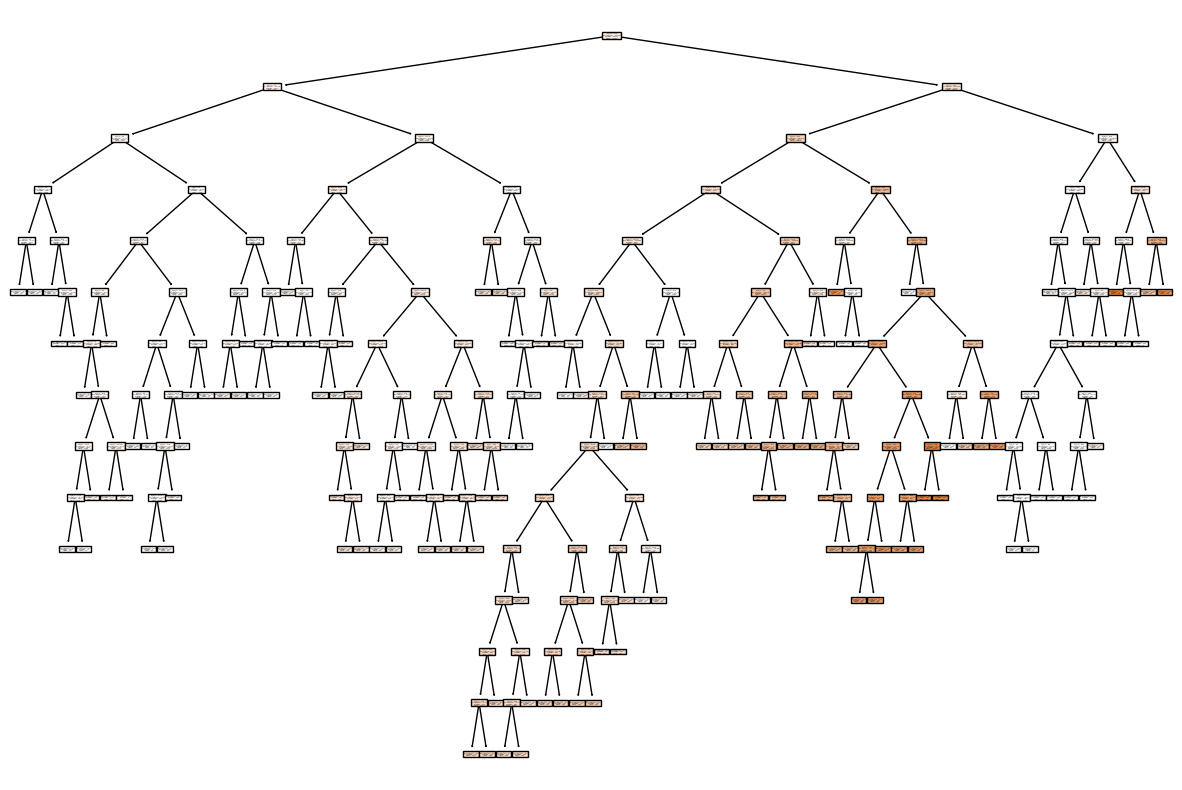

In [481]:
plt.figure(figsize=(15,10))
tree.plot_tree(dectree, filled=True)
plt.show()